In [1]:
%env Keras_BACKEND = tensorflow

env: Keras_BACKEND=tensorflow


In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ipywidgets import interact, IntSlider

from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Model
from keras.layers import Input
from keras.layers import concatenate, add

# Read Mnist Dataset

In [15]:
(x_train0 , y_train0),(x_test0,y_test0) = mnist.load_data()

In [16]:
x_train = x_train0.reshape((60000,28*28))
x_test = x_test0.reshape((10000,28*28))

normalize

In [17]:
x_train -= x_train.min()
x_train = x_train/x_train.max()
y_train = np_utils.to_categorical(y_train0, 10)
y_test = np_utils.to_categorical(y_test0, 10)

# Build model

In [19]:
x = Input(shape=(784,))

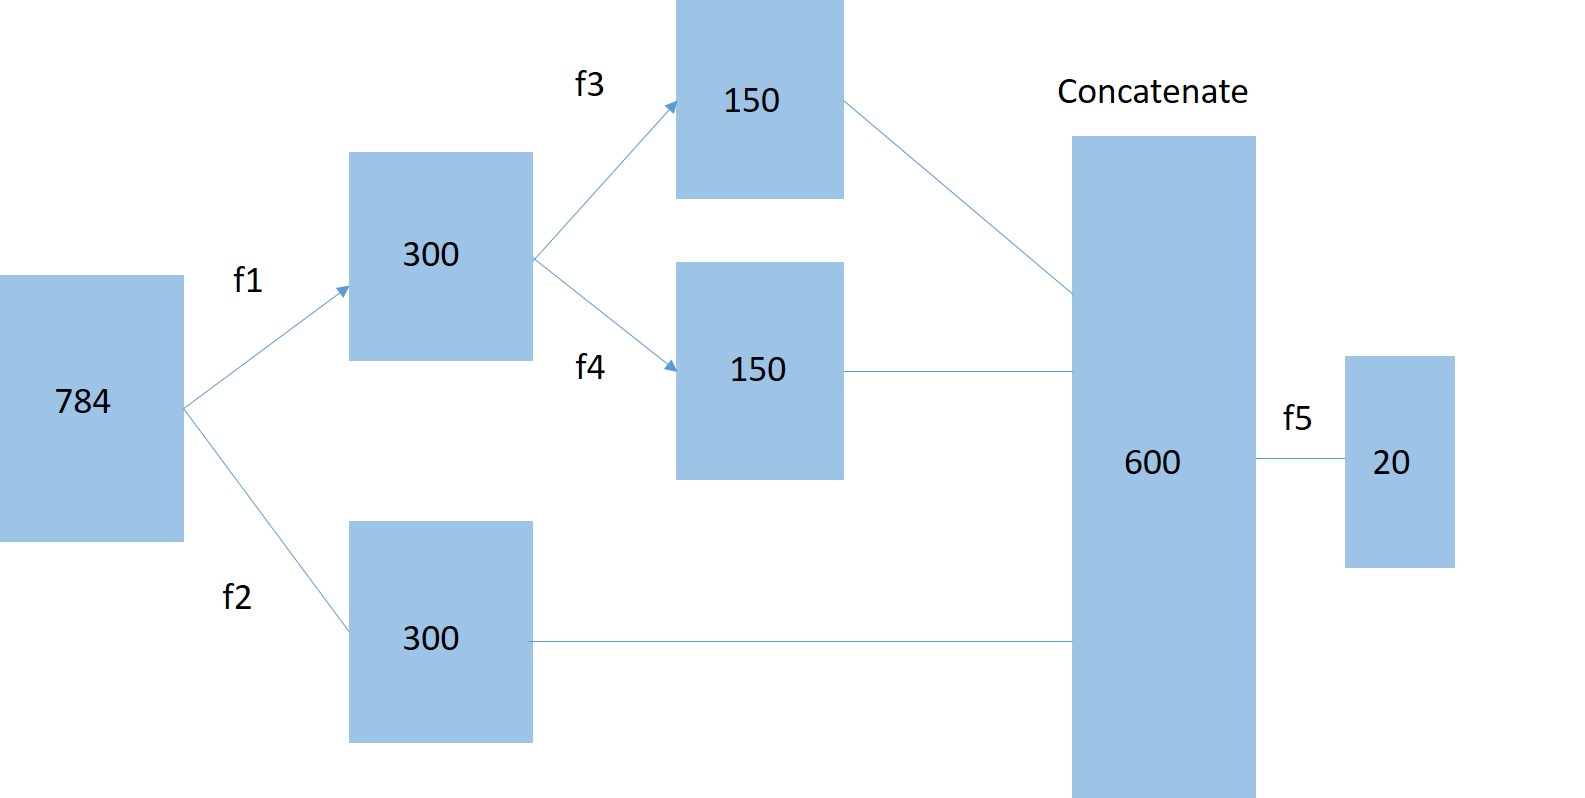

In [40]:
from IPython.display import Image
Image(filename="C:/Users/77/Pic.jpg")

In [57]:
f1 = Dense(300,activation='sigmoid')
f2 = Dense(300,activation='sigmoid')
f3 = Dense(100,activation='relu')
f4 = Dense(100,activation='relu')
f5 = Dense(10,activation='softmax')

In [58]:
h_1 = f1(x)
h_2 = f2(x)
h_31 = f3(h_1)
h_32 = f4(h_1)
y= f5(concatenate([h_2,h_31,h_32]))

In [59]:
model = Model(x, y)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_27 (Dense)                (None, 300)          235500      input_2[0][0]                    
__________________________________________________________________________________________________
dense_28 (Dense)                (None, 300)          235500      input_2[0][0]                    
__________________________________________________________________________________________________
dense_29 (Dense)                (None, 100)          30100       dense_27[0][0]                   
__________________________________________________________________________________________________
dense_30 (

In [60]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001), metrics=['accuracy'])

In [67]:
X=model.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.8226 - acc: 0.8286
Epoch 2/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.7938 - acc: 0.8316
Epoch 3/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.7675 - acc: 0.8340
Epoch 4/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.7435 - acc: 0.8376
Epoch 5/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.7214 - acc: 0.8401
Epoch 6/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.7011 - acc: 0.8426
Epoch 7/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.6824 - acc: 0.8445
Epoch 8/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.6652 - acc: 0.8477
Epoch 9/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.6491 - acc: 0.8493
Epoch 10/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.6343 - acc: 0.8511

In [68]:
score = model.evaluate(x_test,y_test)
print('測試資料的 loss:', score[0])
print('測試資料正確率:', score[1])

10000/10000 [==============================] - 0s 20us/step
測試資料的 loss: 0.758799235278368
測試資料正確率: 0.8204


Text(0, 0.5, 'accuracy')

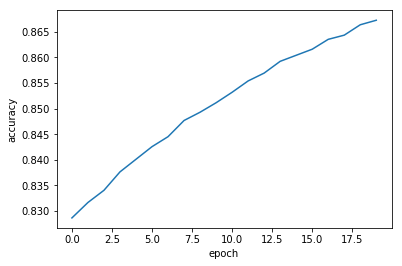

In [69]:
plt.plot(X.history['acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')

Text(0, 0.5, 'Loss')

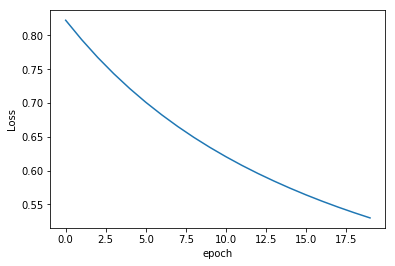

In [70]:
plt.plot(X.history['loss'])
plt.xlabel('epoch')
plt.ylabel('Loss')